In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import openpyxl
from openpyxl.styles import Font 
import os
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

acc_xl = openpyxl.load_workbook('/content/drive/MyDrive/test/Accelerometer_ECS.xlsx')

In [14]:
def draw(acc, max_index, min_index, idx, step_count):
  plt.figure(figsize=(15, 8))
  plt.title("Index: " + str(idx) + ", step: " + str(step_count))
  plt.xlabel("time (s)")
  plt.ylabel("Z-axis acceleration (m/s²)")
  plt.plot(acc)
  plt.scatter(max_index, acc[max_index], c='red')
  plt.scatter(min_index, acc[min_index], c='orange')

In [15]:
# 計算步長
def len_estimate(acc, max_index, min_index, s):  
  # estimate = pow(acc[max_index], 1/2) * s
  estimate = pow(acc[max_index] - acc[min_index], 1 / 4) * s

  print('step length = ', np.sum(estimate), 'cm')

In [16]:
# 計算步數
def count(acc, s, threshold, time_interval, idx):
  step_count = 0

  # 計算acc的局部最大值和最小值
  max_index_all = argrelextrema(acc, np.greater)[0]
  min_index_all = argrelextrema(acc, np.less)[0]
  
  max_index = []
  min_index = []

  max_candidate = []

  # 如果局部最大值大於threshold，加入list max_candidate中
  for m in max_index_all:
    if acc[m] > threshold :
      max_candidate.append(m)

  # 計算每個time interval中，所有局部最大值的最大值
  j = 0
  while j < len(max_candidate):
    j_candidate = []
    
    # 將該time interval中的所有局部最大值加入list j_candidate中
    j_candidate.append(max_candidate[j])    
    for k in range(j + 1, len(max_candidate)): 
      if max_candidate[k] - max_candidate[j] < time_interval:
        j_candidate.append(max_candidate[k])
    max_value = 0
    max_value_index = 0
    
    # 選出該time interval中，所有局部最大值的最大值
    for c in j_candidate:
      if acc[c] > max_value:
        max_value = acc[c]
        max_value_index = c
    max_index.append(max_value_index) 
    step_count = step_count + 1 # 步數加一
    j = j + len(j_candidate)

  # 選出局部最小值 
  for m in max_index:
      min_candidate = []
      for n in min_index_all:
        if n > m and n < m + 31:
          min_candidate.append(n)
      min_value = 0
      min_value_index = 0
      for c in min_candidate:
        if acc[c] < min_value:
          min_value = acc[c]
          min_value_index = c
      min_index.append(min_value_index)
  print('step count = ', step_count)
  draw(acc, max_index, min_index, idx, step_count)

  # 計算步長
  len_estimate(acc, max_index, min_index, s)

1
step count =  10
step length =  597.0289566783683 cm

2
step count =  10
step length =  596.1499867223106 cm

3
step count =  10
step length =  605.9110620381863 cm

4
step count =  10
step length =  607.2361821662358 cm

5
step count =  10
step length =  599.8288969700261 cm

6
step count =  10
step length =  600.1382994216572 cm

7
step count =  10
step length =  597.1837619837006 cm

8
step count =  10
step length =  595.4187897207227 cm

9
step count =  10
step length =  594.8397604243457 cm

10
step count =  10
step length =  595.4368060773199 cm

11
step count =  10
step length =  608.1476932915023 cm

12
step count =  10
step length =  601.7267680401063 cm

13
step count =  10
step length =  598.1586766802761 cm

14
step count =  10
step length =  596.029306208083 cm

15
step count =  10
step length =  599.9647105615333 cm

16
step count =  10
step length =  597.0245264626569 cm



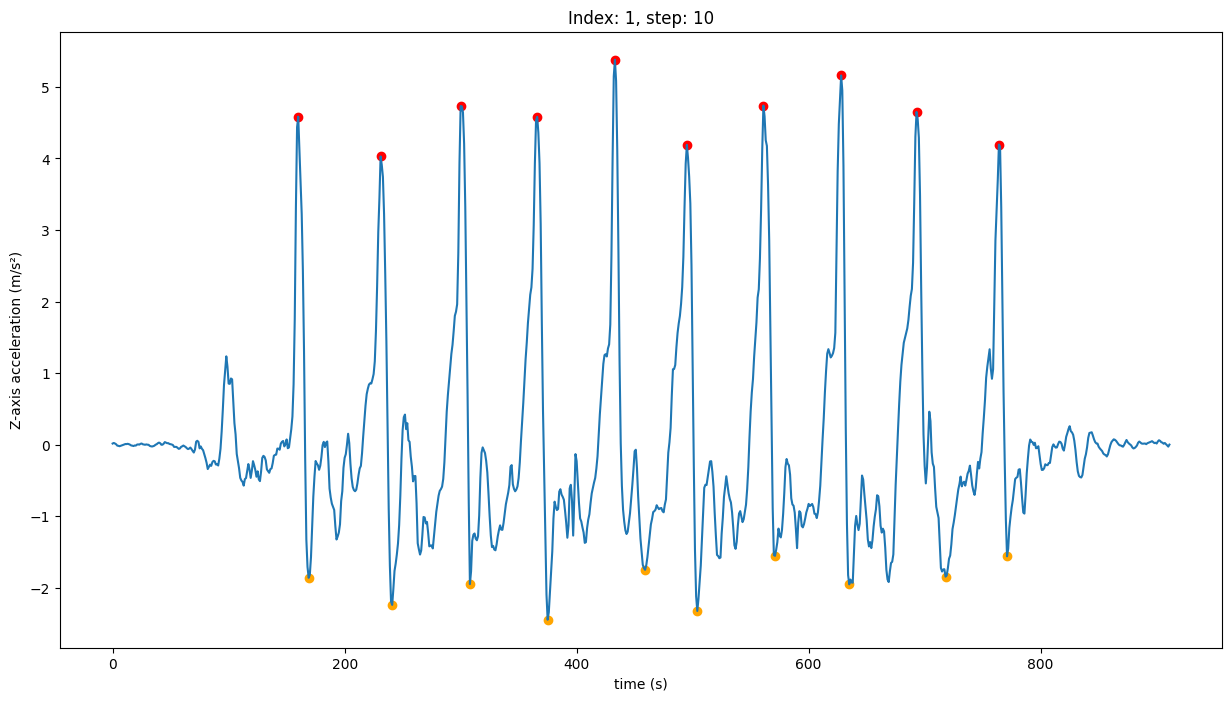

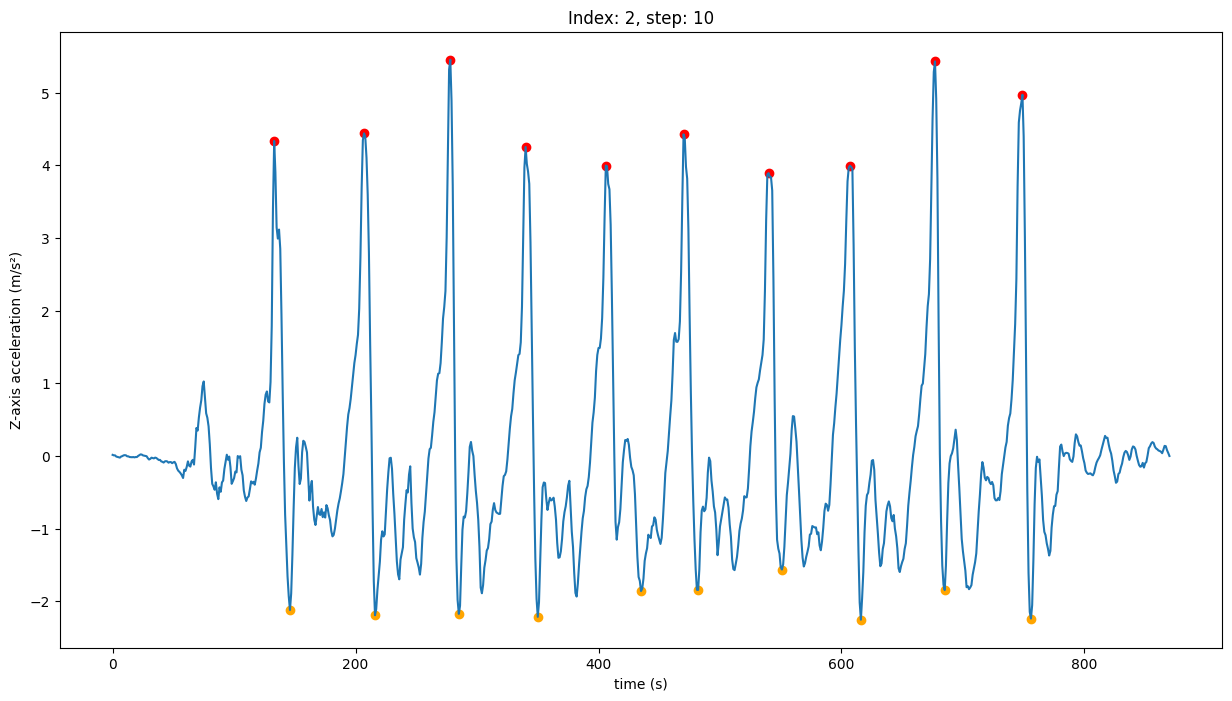

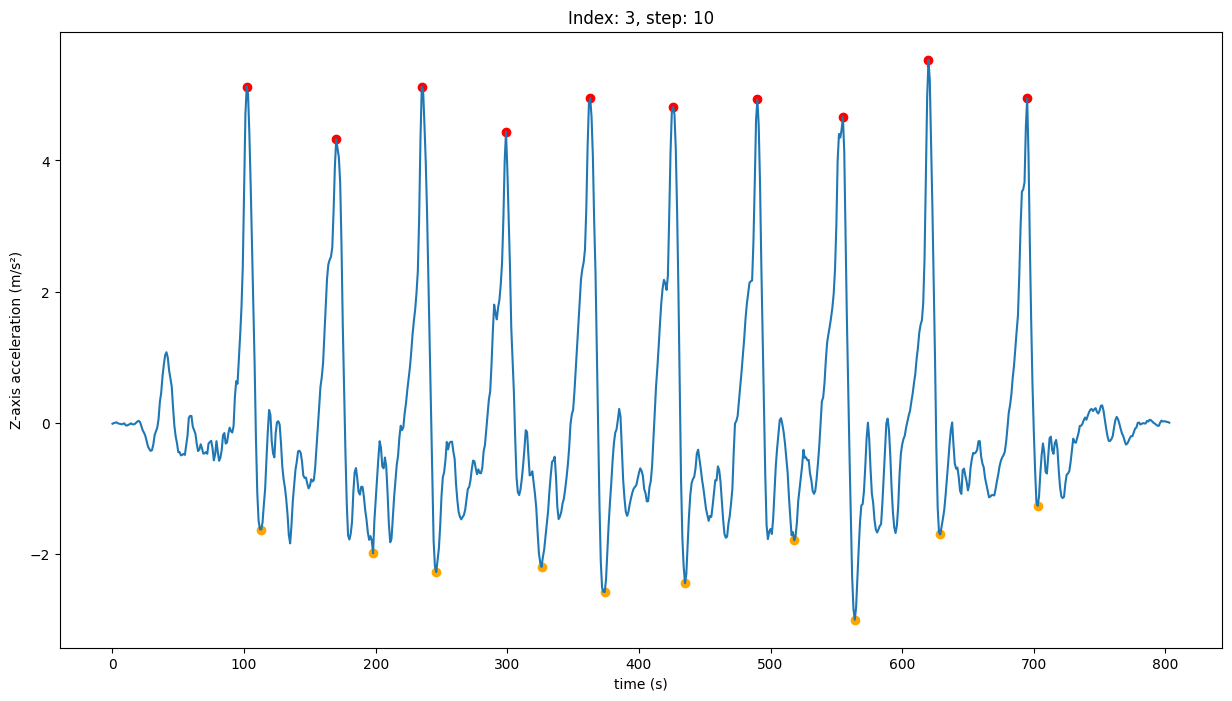

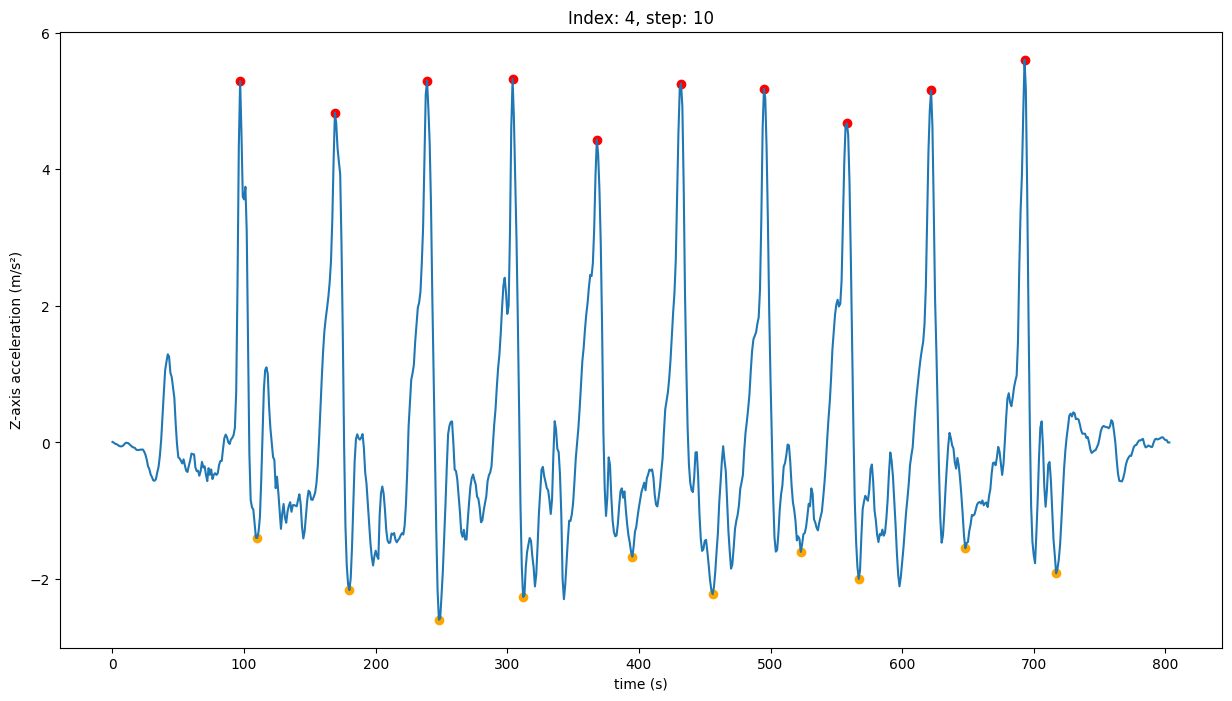

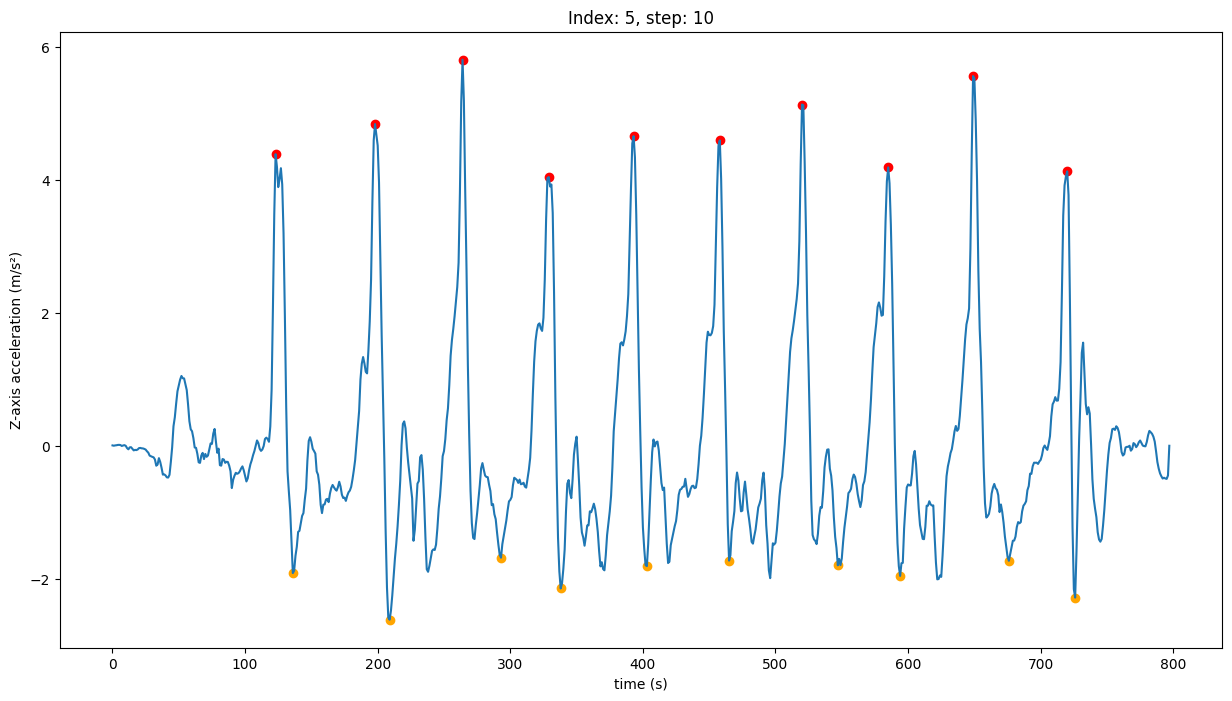

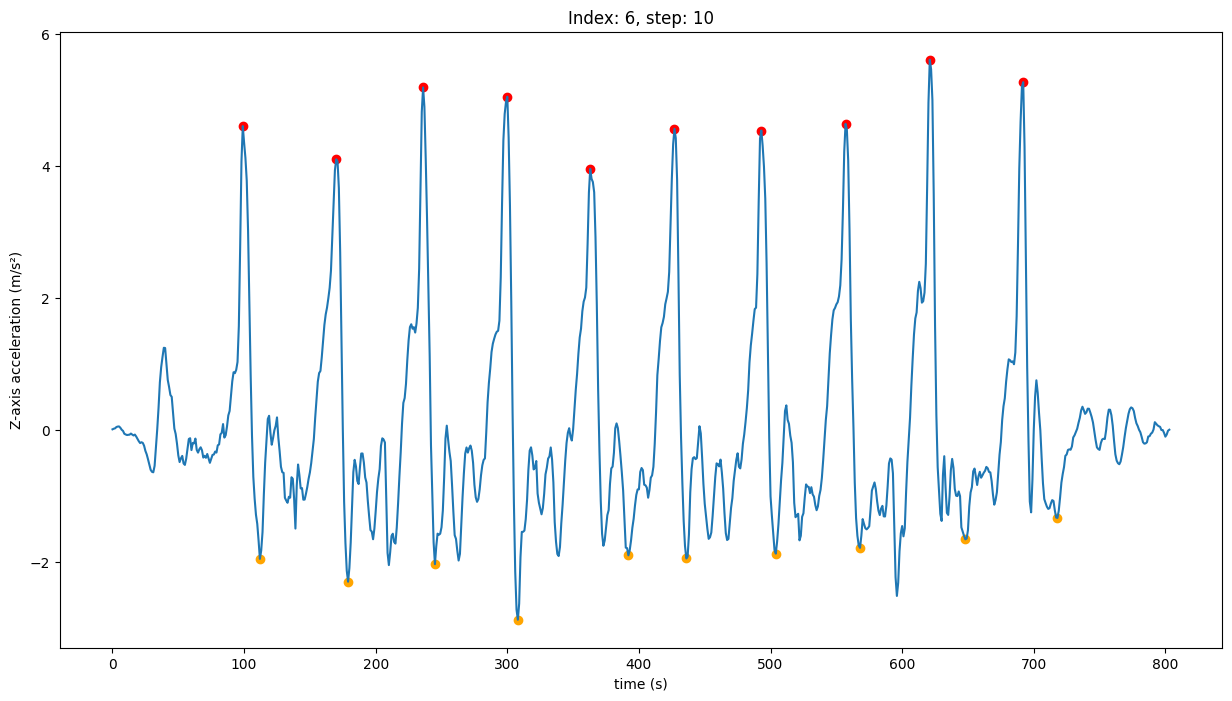

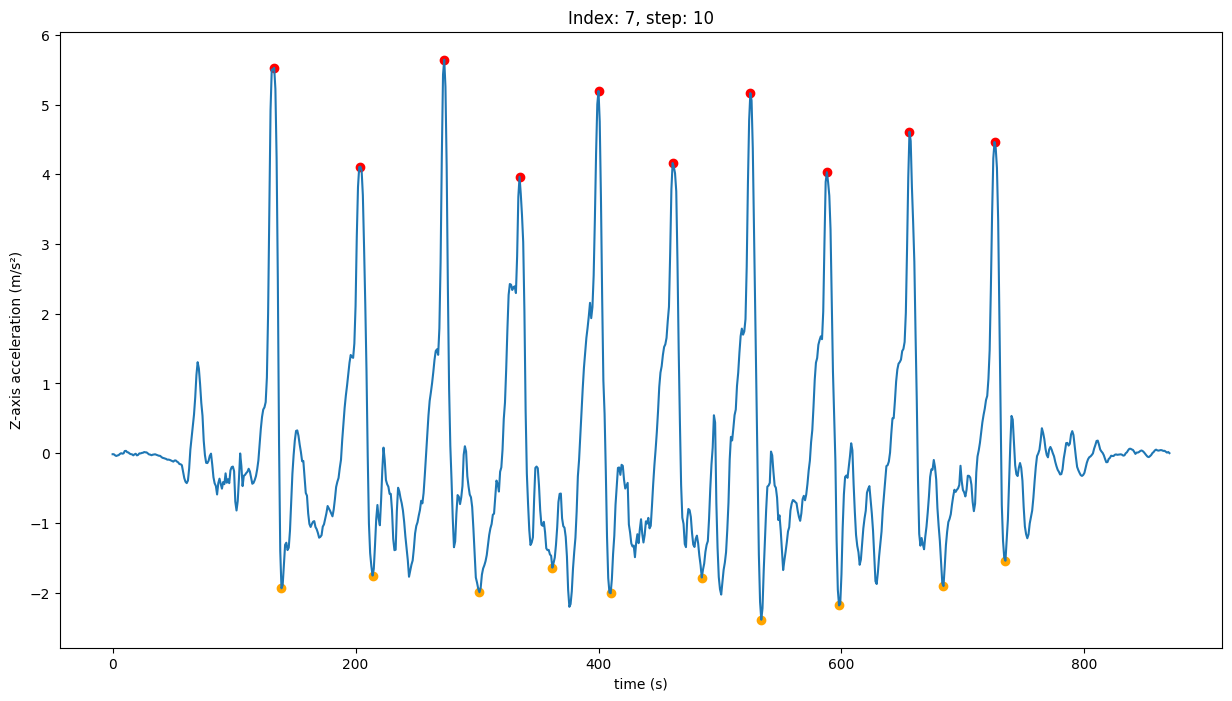

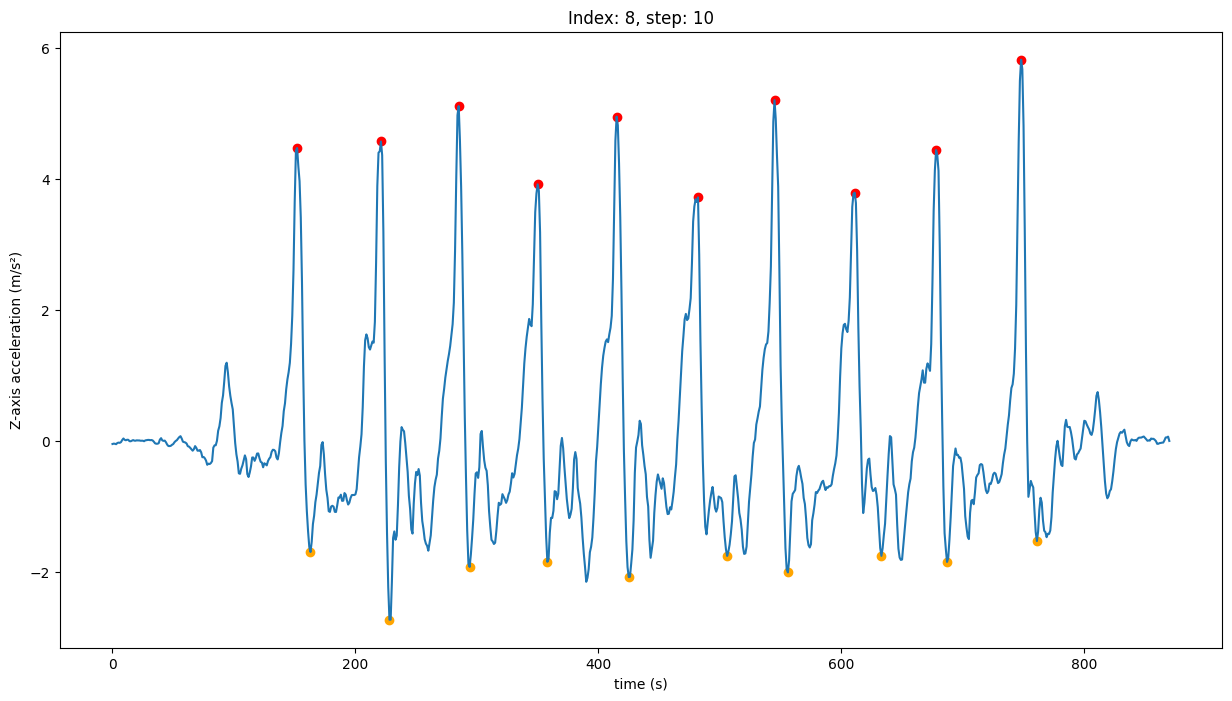

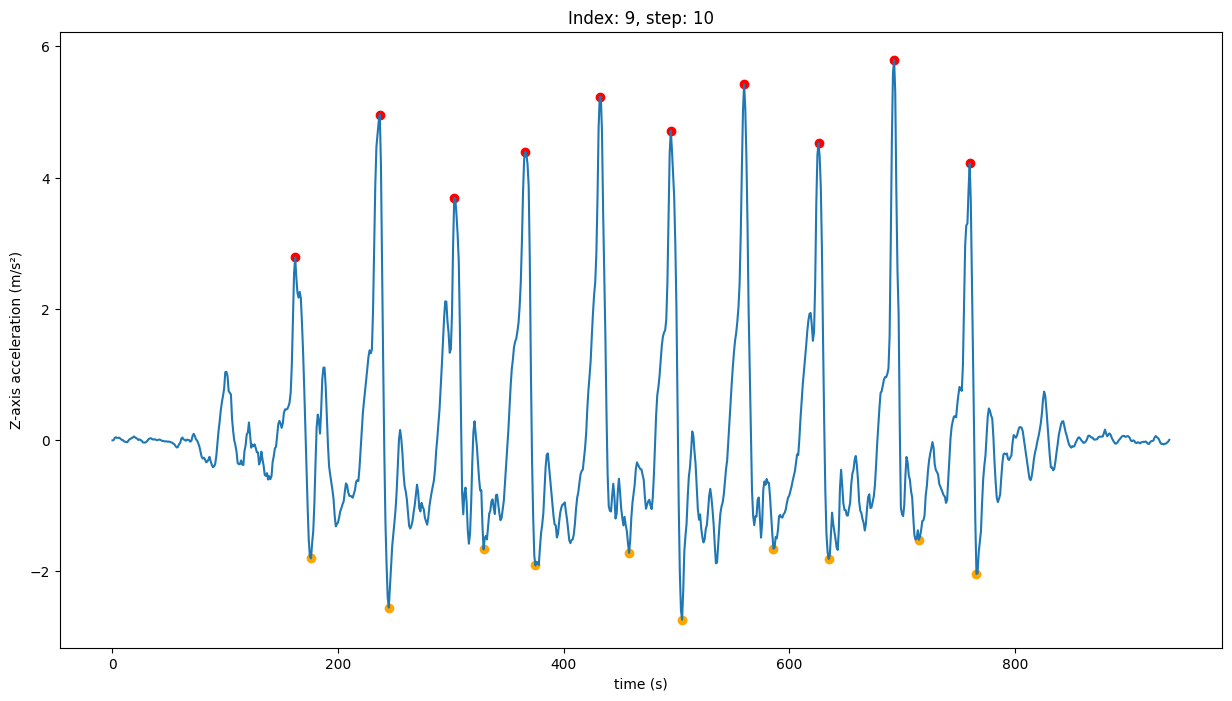

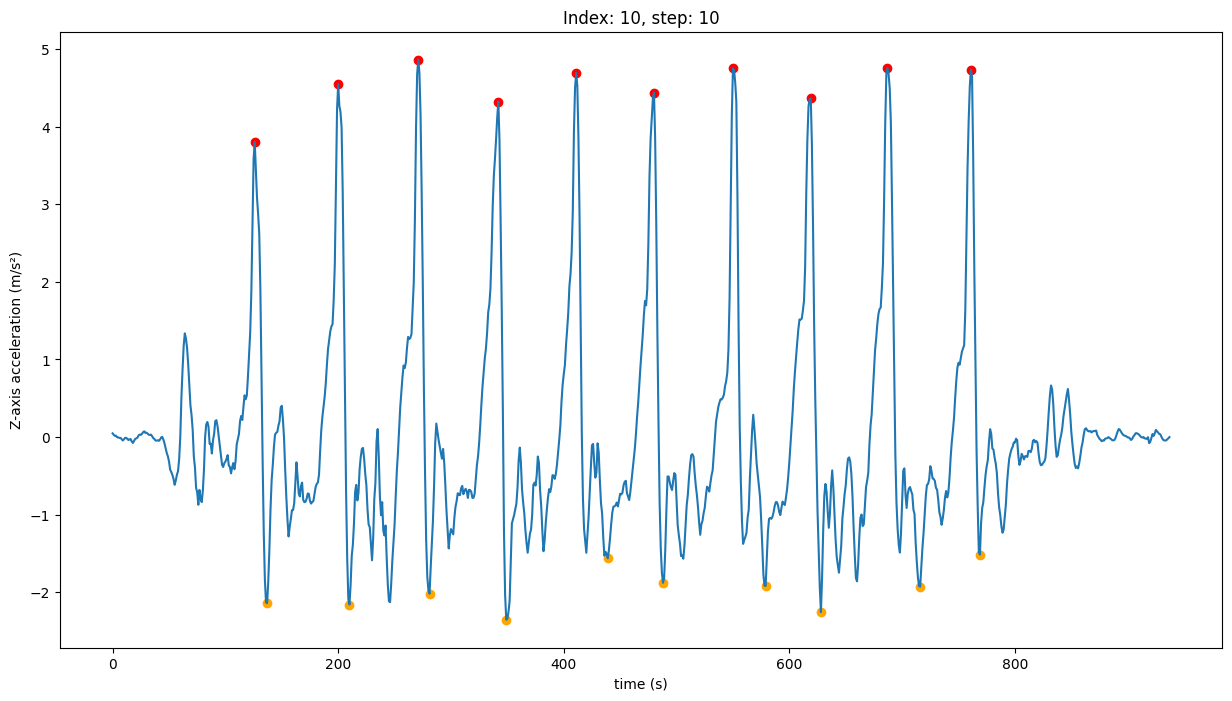

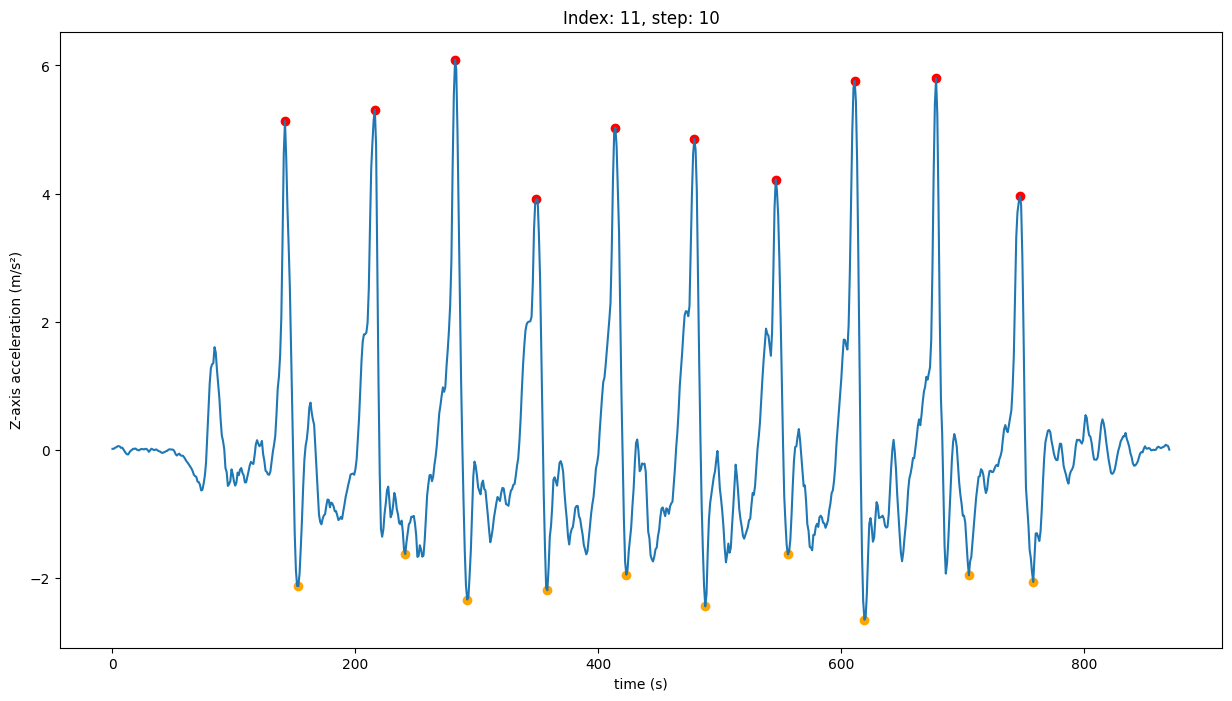

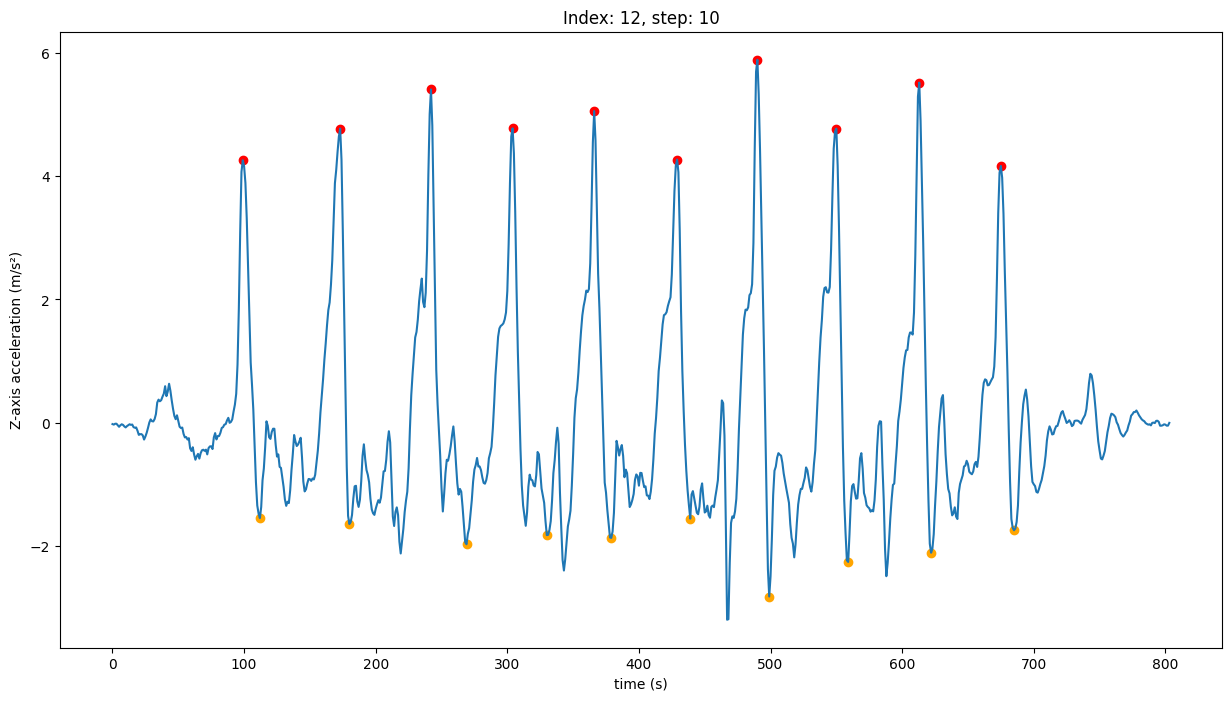

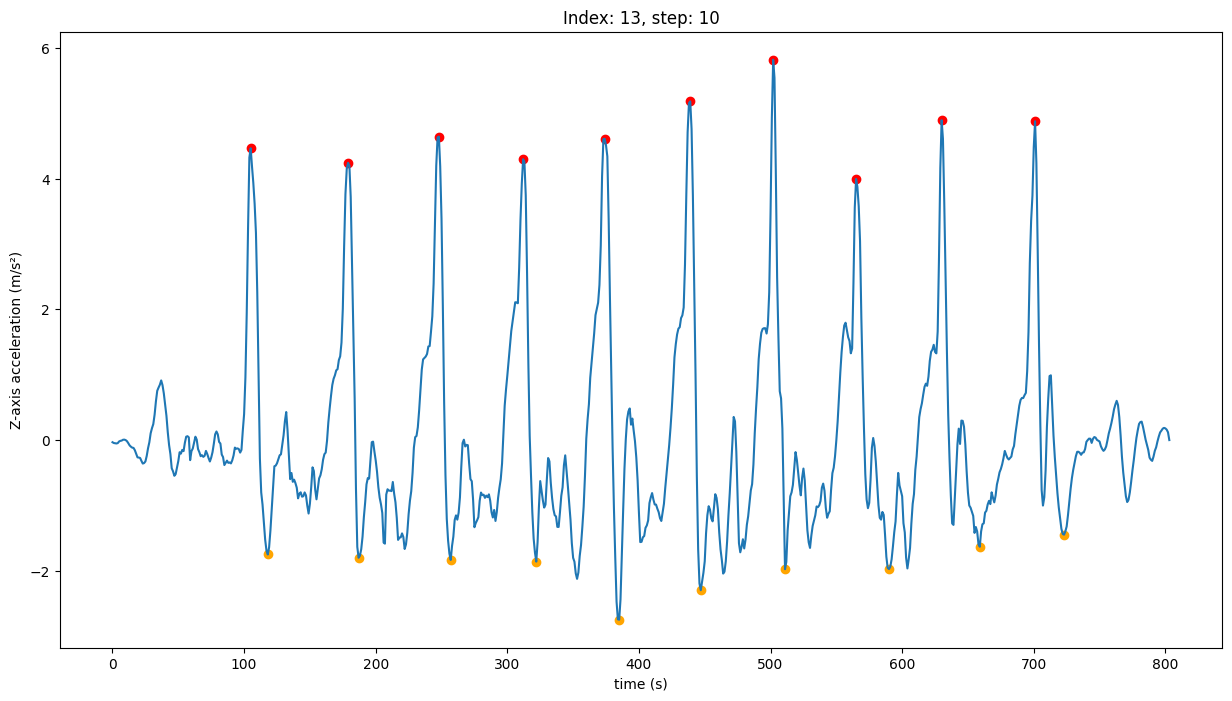

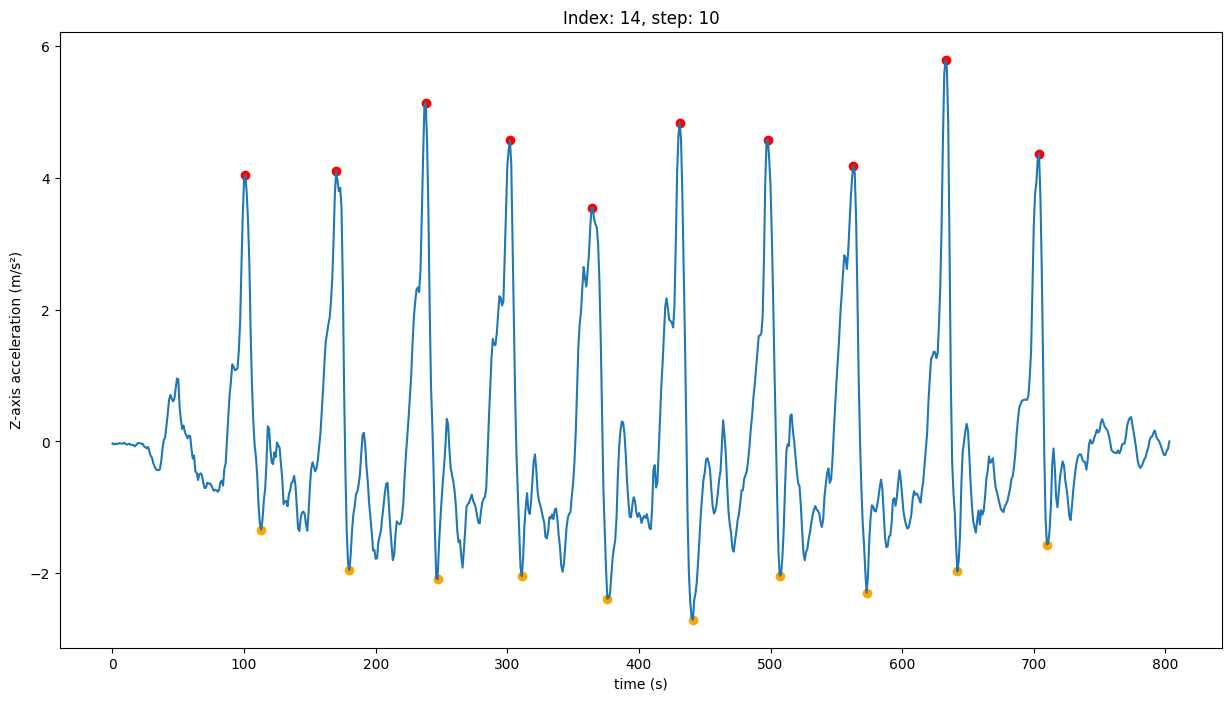

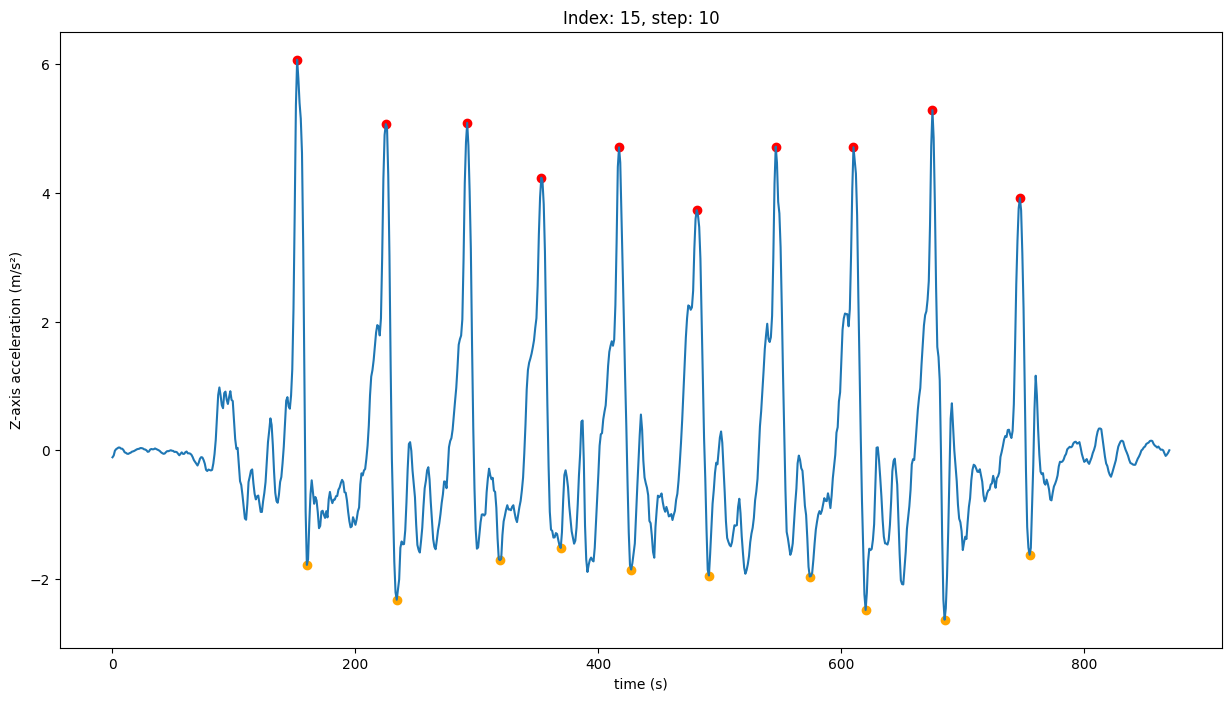

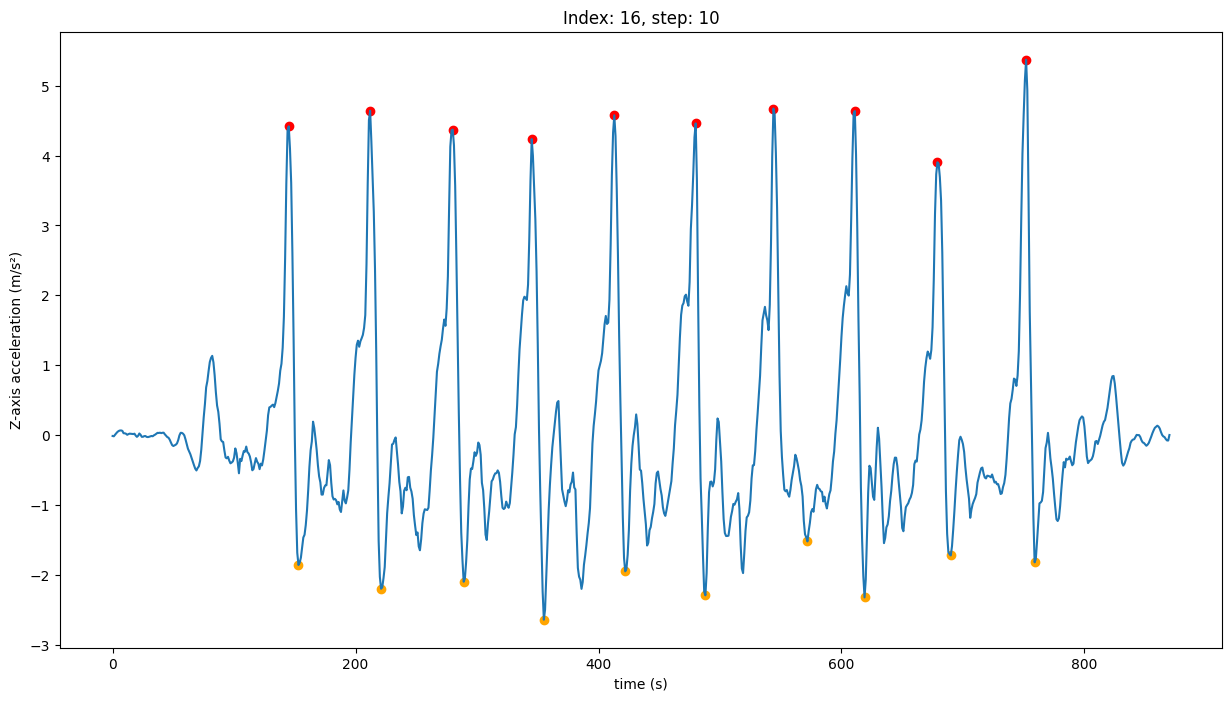

In [17]:
# 0505-11
index_list = [[1300, 2212], [2748,3619], [4088, 4892], [5562, 6366], [6902, 7700], [8376, 9180], [10118, 10989], [11592, 12463], [13133, 14071], [14473, 15411], [15880, 16751], [17354, 18158], [18627, 19431], [20101, 20905], [21575, 22446], [22848, 23719]]

threshold = 1.75
time_interval = 35
s = 37.3

for idx in range(len(index_list)):
  start = index_list[idx][0]
  end = index_list[idx][1]
  length = end - start

  # 讀檔
  acc_sheet = acc_xl.worksheets[0]
  acc_x = np.zeros(length, dtype=float)
  acc_y = np.zeros(length, dtype=float)
  acc_z = np.zeros(length, dtype=float)
  # acc_avg = np.zeros(length, dtype=float)
  for rowNum in range(start + 2, end + 1, 1):
    acc_x[rowNum - start - 2] = acc_sheet.cell(rowNum, 9).value
    acc_y[rowNum - start - 2] = acc_sheet.cell(rowNum, 10).value
    acc_z[rowNum - start - 2] = acc_sheet.cell(rowNum, 11).value
    # acc_avg[rowNum - start - 2] = pow(acc_x[rowNum - start - 2] * acc_x[rowNum - start - 2] + acc_y[rowNum - start - 2] * acc_y[rowNum - start - 2] + acc_z[rowNum - start - 2] * acc_z[rowNum - start - 2], 0.5) 
  print(idx + 1)
  
  # 計算步數
  count(acc_z, s, threshold, time_interval, idx+1)
  print()